#Week 2 Assignment
 preparing a dataset for a machine learning algorithm that can identify wines as a professional would.  



##importing the requierd libraries 

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


##reading thhe data file as CSV

In [ ]:
df = pd.read_csv('/content/winemag-data-assignment-2.csv')

##printing the data

In [ ]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,6154,Australia,The top Australian Cabernets retain distinct v...,NaN,89.0,32.0,Victoria,Pyrenees,NaN,Joe Czerwinski,@JoeCz,Taltarni 2004 Cabernet Sauvignon (Pyrenees),Cabernet Sauvignon,Taltarni
6155,6155,Chile,"Really good wine with blasting dark fruit, win...",Kuyen,89.0,30.0,Maipo Valley,NaN,NaN,Michael Schachner,@wineschach,Antiyal 2006 Kuyen Red (Maipo Valley),Red Blend,Antiyal
6156,6156,France,Importer Bobby Kacher seemingly has a pipeline...,Cuvée Tradition,89.0,13.0,Rhône Valley,Costières de Nîmes,NaN,Joe Czerwinski,@JoeCz,Mas des Bressades 2008 Cuvée Tradition Rosé (C...,Rosé,Mas des Bressades
6157,6157,US,"With a ruby-crimson color, this sparkling wine...",Rouge,89.0,35.0,California,Napa Valley,Napa,NaN,NaN,Frank Family NV Rouge Sparkling (Napa Valley),Sparkling Blend,Frank Family


In [ ]:
df.describe()

,Unnamed: 0,points,price
count,6159.000000,6132.000000,5737.000000
mean,3079.000000,88.201729,34.633781
std,1778.094486,2.902916,49.271650
min,0.000000,80.000000,4.000000
25%,1539.500000,86.000000,17.000000
50%,3079.000000,88.000000,25.000000
75%,4618.500000,90.000000,40.000000
max,6158.000000,100.000000,1900.000000


##droping the coloumns

In [ ]:
df.drop(['description','region_2','taster_name','taster_twitter_handle','title','province'],axis=1,inplace=True)

##conveting text into numbers

####we will create a method that will convert a text to word


In [ ]:
def convert(x):
    set_x=set(x)
    w_index={}
    for i,w in enumerate(set_x):
        w_index[w]=i
    x=x.replace(w_index)
    return x

###using the method that we have created to convertd the string to numbers

In [ ]:
df.country=convert(df.country)
df.region_1=convert(df.region_1)
df.variety=convert(df.variety)
df.winery=convert(df.winery)


###printing the result after converting

In [ ]:
df

,Unnamed: 0,country,designation,points,price,region_1,variety,winery
0,0,27,Vulkà Bianco,87.0,NaN,104,75,1263
1,1,29,Avidagos,87.0,15.0,0,95,951
2,2,5,NaN,87.0,14.0,123,44,3602
3,3,5,Reserve Late Harvest,87.0,13.0,493,200,3878
4,4,5,Vintner's Reserve Wild Child Block,87.0,65.0,123,249,2777
...,...,...,...,...,...,...,...,...
6154,6154,17,NaN,89.0,32.0,433,243,1690
6155,6155,22,Kuyen,89.0,30.0,0,173,2305
6156,6156,20,Cuvée Tradition,89.0,13.0,559,217,3142
6157,6157,5,Rouge,89.0,35.0,448,11,1693


##filling the NaN  in (price) column with the mean value

###before  filling the NaN values

In [ ]:
df.isna().sum()

Unnamed: 0        0
country           0
designation    1835
points           27
price           422
region_1          0
variety           0
winery            0
dtype: int64

###after filling the NaN values

In [ ]:
df['price'].fillna(int(df['price'].mean()), inplace=True)

df.isna().sum()

Unnamed: 0        0
country           0
designation    1835
points           27
price             0
region_1          0
variety           0
winery            0
dtype: int64

##filling the NaN  in (points) column with the median value

###before  filling the NaN values

In [ ]:
df.isna().sum()

Unnamed: 0        0
country           0
designation    1835
points           27
price             0
region_1          0
variety           0
winery            0
dtype: int64

###after filling the NaN values

In [ ]:
df['points'].fillna(int(df['points'].median()), inplace=True)

In [ ]:
df.isna().sum()

Unnamed: 0        0
country           0
designation    1835
points            0
price             0
region_1          0
variety           0
winery            0
dtype: int64

In [ ]:
df

,Unnamed: 0,country,designation,points,price,region_1,variety,winery
0,0,27,Vulkà Bianco,87.0,34.0,104,75,1263
1,1,29,Avidagos,87.0,15.0,0,95,951
2,2,5,NaN,87.0,14.0,123,44,3602
3,3,5,Reserve Late Harvest,87.0,13.0,493,200,3878
4,4,5,Vintner's Reserve Wild Child Block,87.0,65.0,123,249,2777
...,...,...,...,...,...,...,...,...
6154,6154,17,NaN,89.0,32.0,433,243,1690
6155,6155,22,Kuyen,89.0,30.0,0,173,2305
6156,6156,20,Cuvée Tradition,89.0,13.0,559,217,3142
6157,6157,5,Rouge,89.0,35.0,448,11,1693


##simplifing the dataset

In [ ]:
df.set_index('Unnamed: 0',inplace=True)

In [ ]:
df

,country,designation,points,price,region_1,variety,winery
Unnamed: 0,,,,,,,
0,27,Vulkà Bianco,87.0,34.0,104,75,1263
1,29,Avidagos,87.0,15.0,0,95,951
2,5,NaN,87.0,14.0,123,44,3602
3,5,Reserve Late Harvest,87.0,13.0,493,200,3878
4,5,Vintner's Reserve Wild Child Block,87.0,65.0,123,249,2777
...,...,...,...,...,...,...,...
6154,17,NaN,89.0,32.0,433,243,1690
6155,22,Kuyen,89.0,30.0,0,173,2305
6156,20,Cuvée Tradition,89.0,13.0,559,217,3142


##spliting the data into input(x) and output(y)

In [ ]:
x= df.iloc[:,1:6]

In [ ]:
x

,designation,points,price,region_1,variety
Unnamed: 0,,,,,
0,Vulkà Bianco,87.0,34.0,104,75
1,Avidagos,87.0,15.0,0,95
2,NaN,87.0,14.0,123,44
3,Reserve Late Harvest,87.0,13.0,493,200
4,Vintner's Reserve Wild Child Block,87.0,65.0,123,249
...,...,...,...,...,...
6154,NaN,89.0,32.0,433,243
6155,Kuyen,89.0,30.0,0,173
6156,Cuvée Tradition,89.0,13.0,559,217


In [ ]:
y = df.iloc[:,1]

In [ ]:
y

Unnamed: 0
0                             Vulkà Bianco
1                                 Avidagos
2                                      NaN
3                     Reserve Late Harvest
4       Vintner's Reserve Wild Child Block
                       ...                
6154                                   NaN
6155                                 Kuyen
6156                       Cuvée Tradition
6157                                 Rouge
6158                                   NaN
Name: designation, Length: 6159, dtype: object

##printing the data to see the changes now

In [ ]:
df.describe()

,country,points,price,region_1,variety,winery
count,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000,6159.000000
mean,14.385452,88.200844,34.590356,249.214970,153.283488,1971.692807
std,9.509051,2.896576,47.553699,187.907445,86.515817,1131.503047
min,0.000000,80.000000,4.000000,0.000000,0.000000,0.000000
25%,5.000000,86.000000,17.000000,88.000000,89.000000,1007.500000
50%,16.000000,88.000000,27.000000,219.000000,173.000000,1942.000000
75%,24.000000,90.000000,40.000000,415.000000,243.000000,2959.000000
max,31.000000,100.000000,1900.000000,613.000000,284.000000,3957.000000


In [ ]:
df.mode()

,country,designation,points,price,region_1,variety,winery
0,5,Reserve,88.0,34.0,0,249,1756


##plot (histogram) with set the size of the plots to (10,10)

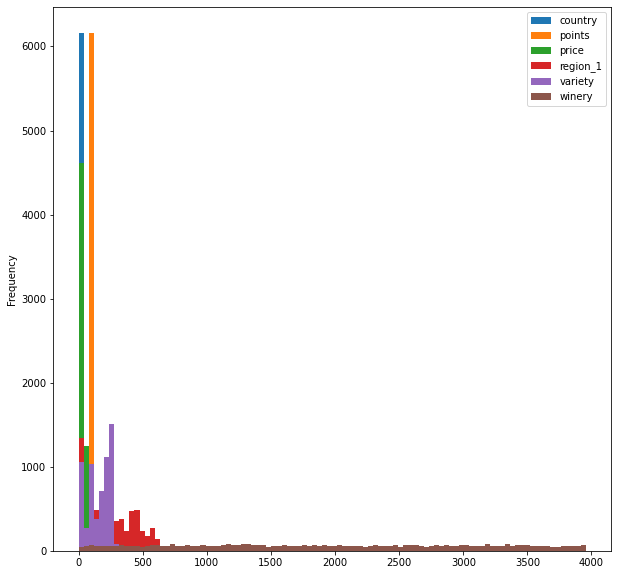

In [ ]:
df.plot.hist(bins=100,figsize=(10, 10))

## finaly, we will the new DataFrame as a csv file 

In [ ]:
df.to_csv('assginemnt2.csv')